In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

data = pd.read_csv('num_booking_status.csv')
data.keys()

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [7]:
from sklearn.preprocessing import OneHotEncoder
import seaborn as sb
import numpy as np
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams

def get_corr(df):
    plt.rcParams["figure.figsize"] = (50, 50)
    sb.heatmap(df.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Blues', #색상
           vmin = -1, vmax=1, #컬러차트 영역 -1 ~ +1
          )
    print()
    
def draw_pairplot(df, keys, hue):
    sb.pairplot( data=df, vars=(keys), plot_kws=dict(alpha=0.1), hue=hue )
    print()
    
def get_standard_norm(series):
    # price = price.loc[outlier:len(data)-outlier, :]
    mean = np.mean(series)   # 17.41
    std = np.std(series)     # 2.94

    price_pdf = stats.norm.pdf(series.sort_values(), mean, std)

    plt.plot(series.sort_values(), price_pdf)
    sb.histplot(data = series, color="Black",stat = "probability",alpha=0.3)


In [4]:
import seaborn as sns

ohe = OneHotEncoder(sparse=False)
# fit_transform은 train에만 사용하고 test에는 학습된 인코더에 fit만 해야한다
meal_type = ohe.fit_transform(data[['type_of_meal_plan']])
meal_type = pd.DataFrame(meal_type)

df = pd.DataFrame()
df['meal_type_1'] = meal_type.loc[:, 0]
df['meal_type_2'] = meal_type.loc[:, 1]
df['meal_type_3'] = meal_type.loc[:, 2]
df['meal_type_4'] = meal_type.loc[:, 3]
df['avg_price_per_room'] = data['avg_price_per_room']
df['booking_status'] = data['booking_status']


In [6]:
ohe = OneHotEncoder(sparse=False)
# fit_transform은 train에만 사용하고 test에는 학습된 인코더에 fit만 해야한다
train_cat = ohe.fit_transform(data[['room_type_reserved']])
train_cat = pd.DataFrame(train_cat)
df = pd.DataFrame()
df['Room_Type_1'] = train_cat.loc[:, 0]
df['Room_Type_2'] = train_cat.loc[:, 1]
df['Room_Type_3'] = train_cat.loc[:, 2]
df['Room_Type_4'] = train_cat.loc[:, 3]
df['Room_Type_5'] = train_cat.loc[:, 4]
df['Room_Type_6'] = train_cat.loc[:, 5]
df['Room_Type_7'] = train_cat.loc[:, 6]
df['avg_price_per_room'] = data['avg_price_per_room']
df['booking_status'] = data['booking_status']


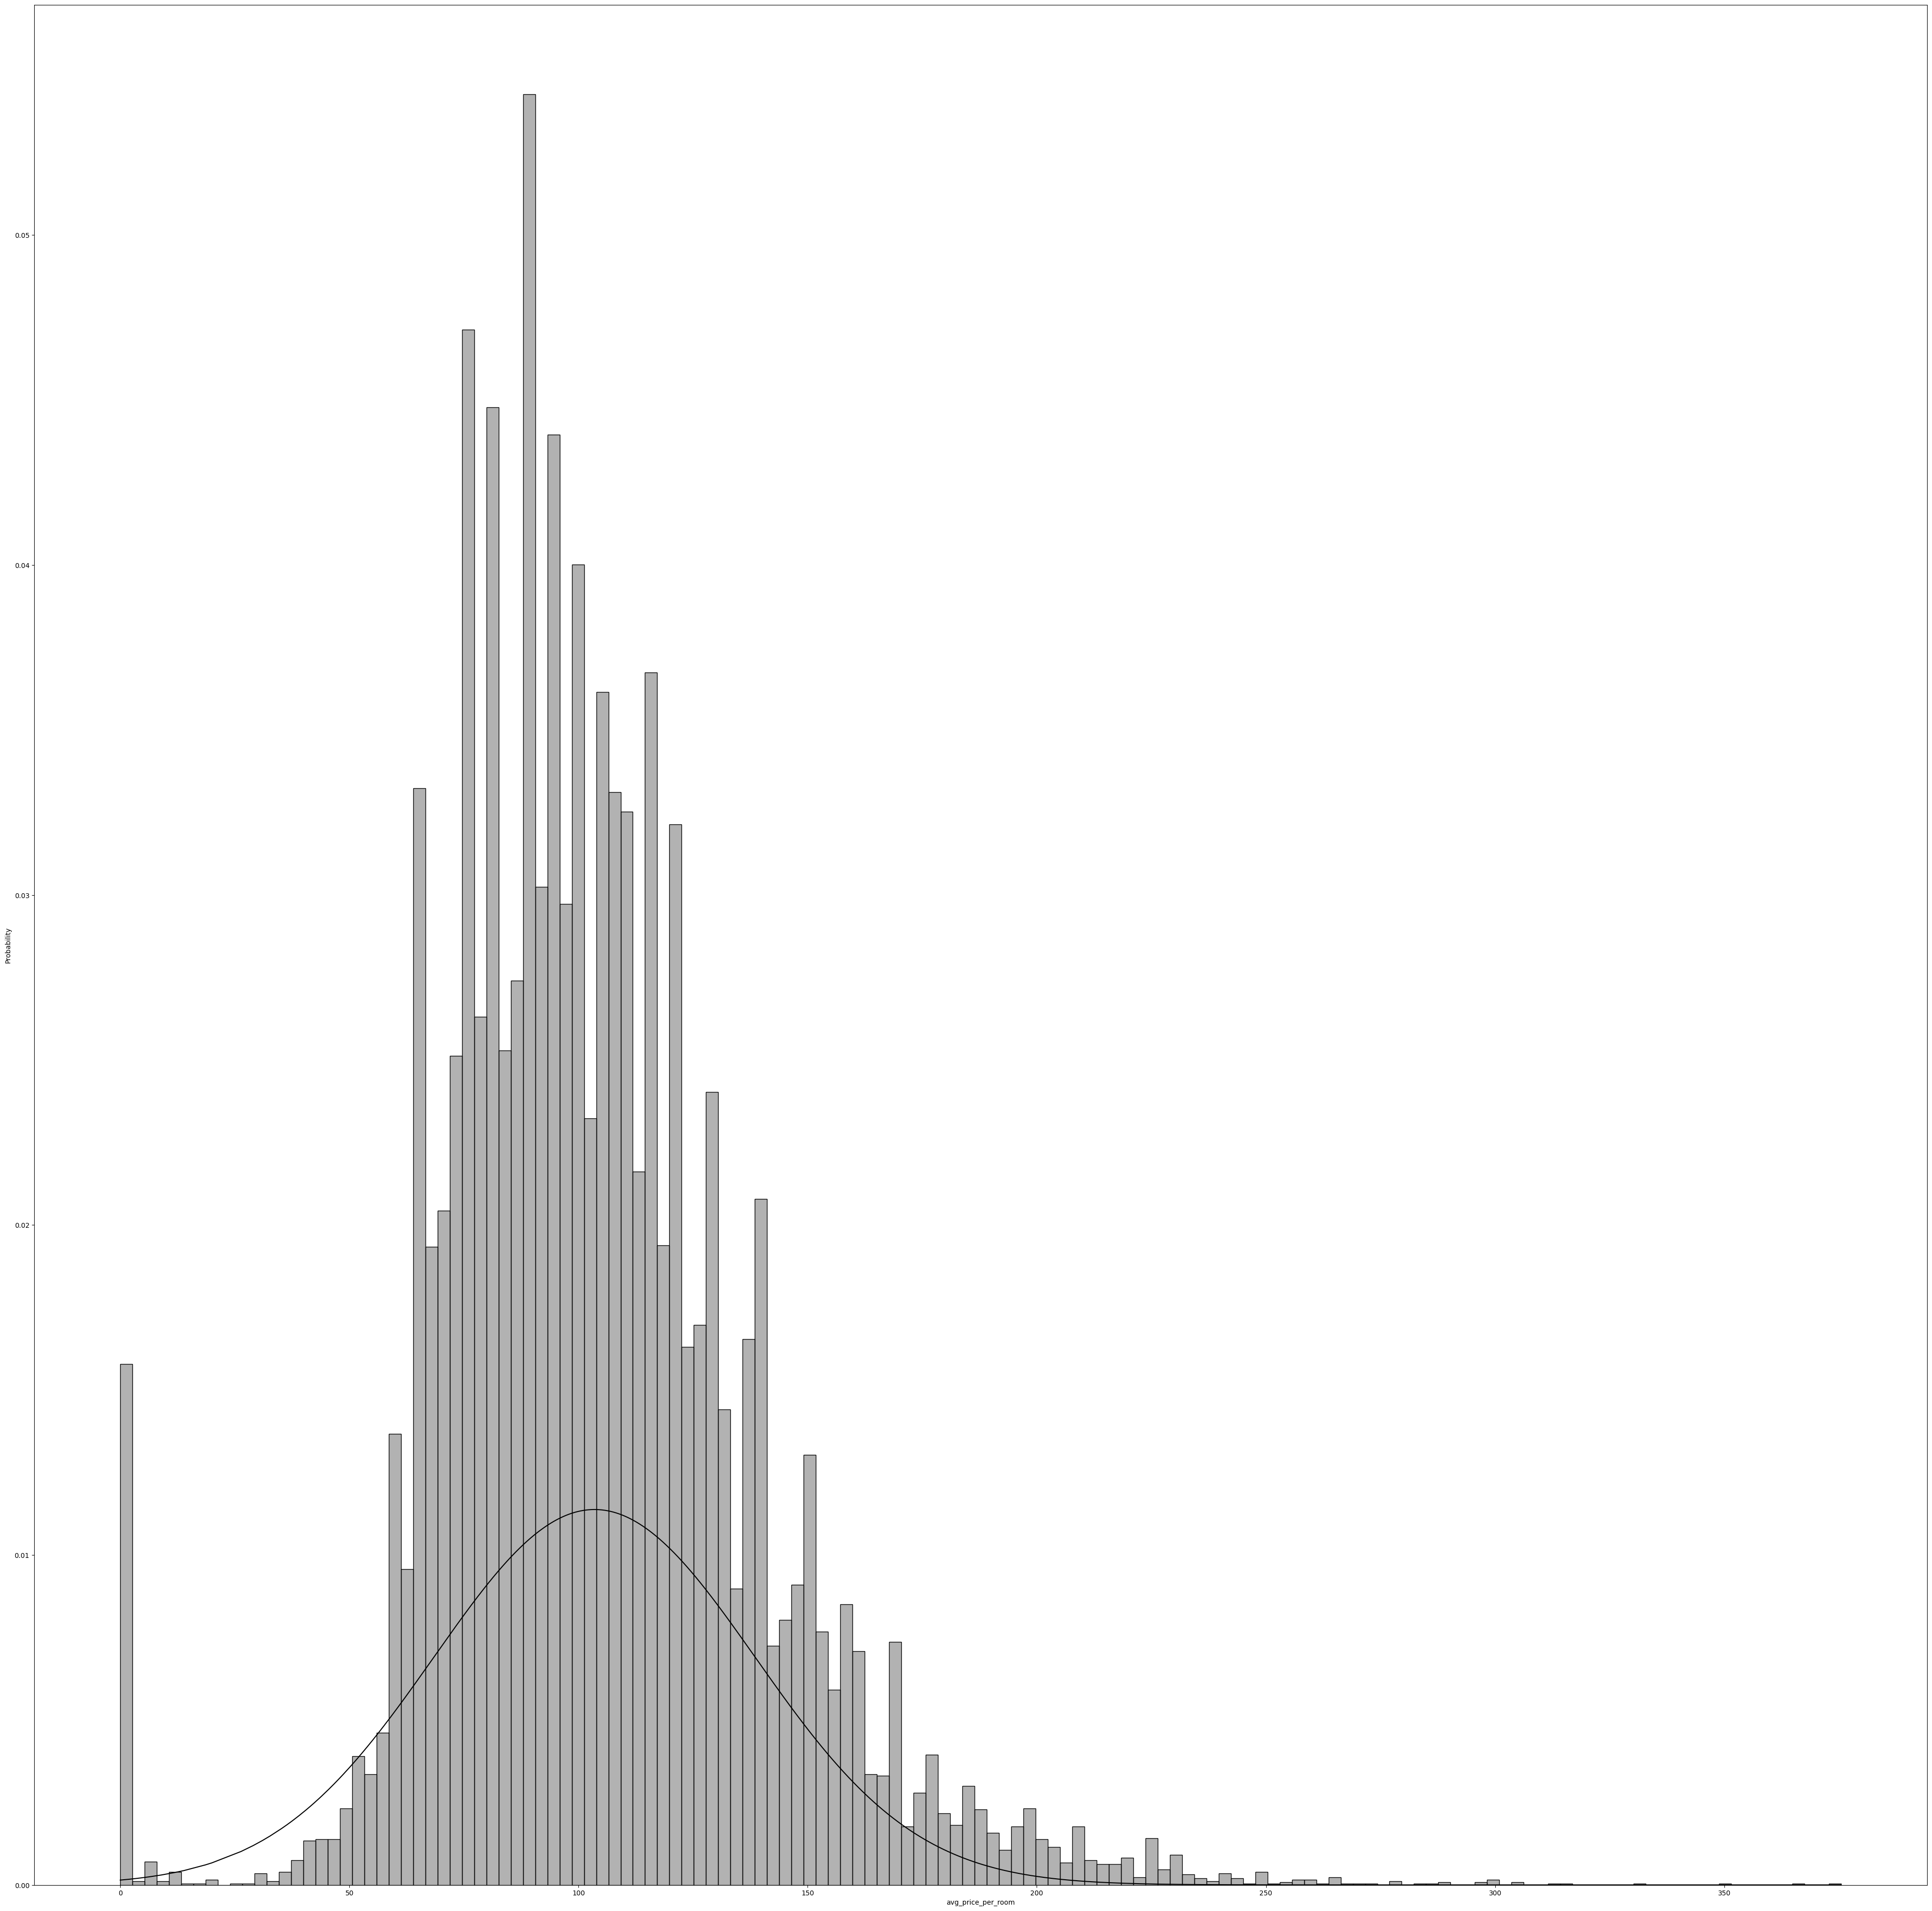

In [8]:

get_standard_norm(data['avg_price_per_room'])

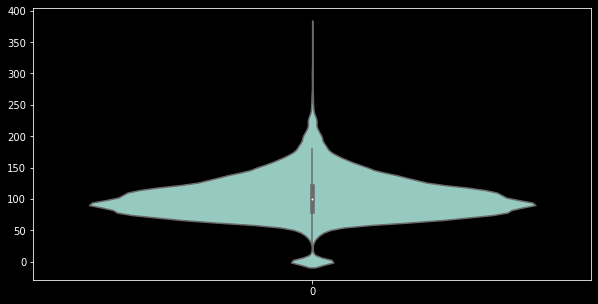

In [11]:
plt.figure(figsize=(10, 5))
ax = sb.violinplot(data['avg_price_per_room'])
plt.show()


In [7]:
# 모든 string -> num으로 바꾸기
ohe = OneHotEncoder(sparse=False)
train_cat = ohe.fit_transform(data[['type_of_meal_plan']])
train_cat = pd.DataFrame(train_cat)
data['meal_type_1'] = train_cat.loc[:, 0]
data['meal_type_2'] = train_cat.loc[:, 1]
data['meal_type_3'] = train_cat.loc[:, 2]
data['meal_type_4'] = train_cat.loc[:, 3]


In [10]:
train_cat = ohe.fit_transform(data[['room_type_reserved']])
train_cat = pd.DataFrame(train_cat)
data['room_type_1'] = train_cat.loc[:, 0]
data['room_type_2'] = train_cat.loc[:, 1]
data['room_type_3'] = train_cat.loc[:, 2]
data['room_type_4'] = train_cat.loc[:, 3]
data['room_type_5'] = train_cat.loc[:, 4]
data['room_type_6'] = train_cat.loc[:, 5]
data['room_type_7'] = train_cat.loc[:, 6]



In [9]:
train_cat = ohe.fit_transform(data[['market_segment_type']])
train_cat = pd.DataFrame(train_cat)
data['Corporate'] = train_cat.loc[:, 0]
data['Complementary'] = train_cat.loc[:, 1]
data['Online'] = train_cat.loc[:, 2]
data['Offline'] = train_cat.loc[:, 3]
data['Aviation'] = train_cat.loc[:, 4]
data.to_csv('onehot_sample.csv', index=False)


In [15]:

feat_list = [
    'meal_type_1', 'meal_type_2', 'meal_type_3', 'meal_type_4',
    'room_type_1', 'room_type_2', 'room_type_3', 'room_type_4', 'room_type_5', 'room_type_6', 'room_type_7',
    'Corporate', 'Complementary', 'Online', 'Offline', 'Aviation'
    ]

for i in feat_list:
    print(data[i].value_counts())

1.0    19492
0.0     5900
Name: meal_type_1, dtype: int64
0.0    23054
1.0     2338
Name: meal_type_2, dtype: int64
0.0    25390
1.0        2
Name: meal_type_3, dtype: int64
0.0    21832
1.0     3560
Name: meal_type_4, dtype: int64
1.0    19684
0.0     5708
Name: room_type_1, dtype: int64
0.0    24894
1.0      498
Name: room_type_2, dtype: int64
0.0    25388
1.0        4
Name: room_type_3, dtype: int64
0.0    21150
1.0     4242
Name: room_type_4, dtype: int64
0.0    25206
1.0      186
Name: room_type_5, dtype: int64
0.0    24725
1.0      667
Name: room_type_6, dtype: int64
0.0    25281
1.0      111
Name: room_type_7, dtype: int64
0.0    25307
1.0       85
Name: Corporate, dtype: int64
0.0    25120
1.0      272
Name: Complementary, dtype: int64
0.0    23965
1.0     1427
Name: Online, dtype: int64
0.0    17994
1.0     7398
Name: Offline, dtype: int64
1.0    16210
0.0     9182
Name: Aviation, dtype: int64


In [119]:
data = pd.read_csv('onehot_sample.csv')

get_corr(data.loc[10:, :])

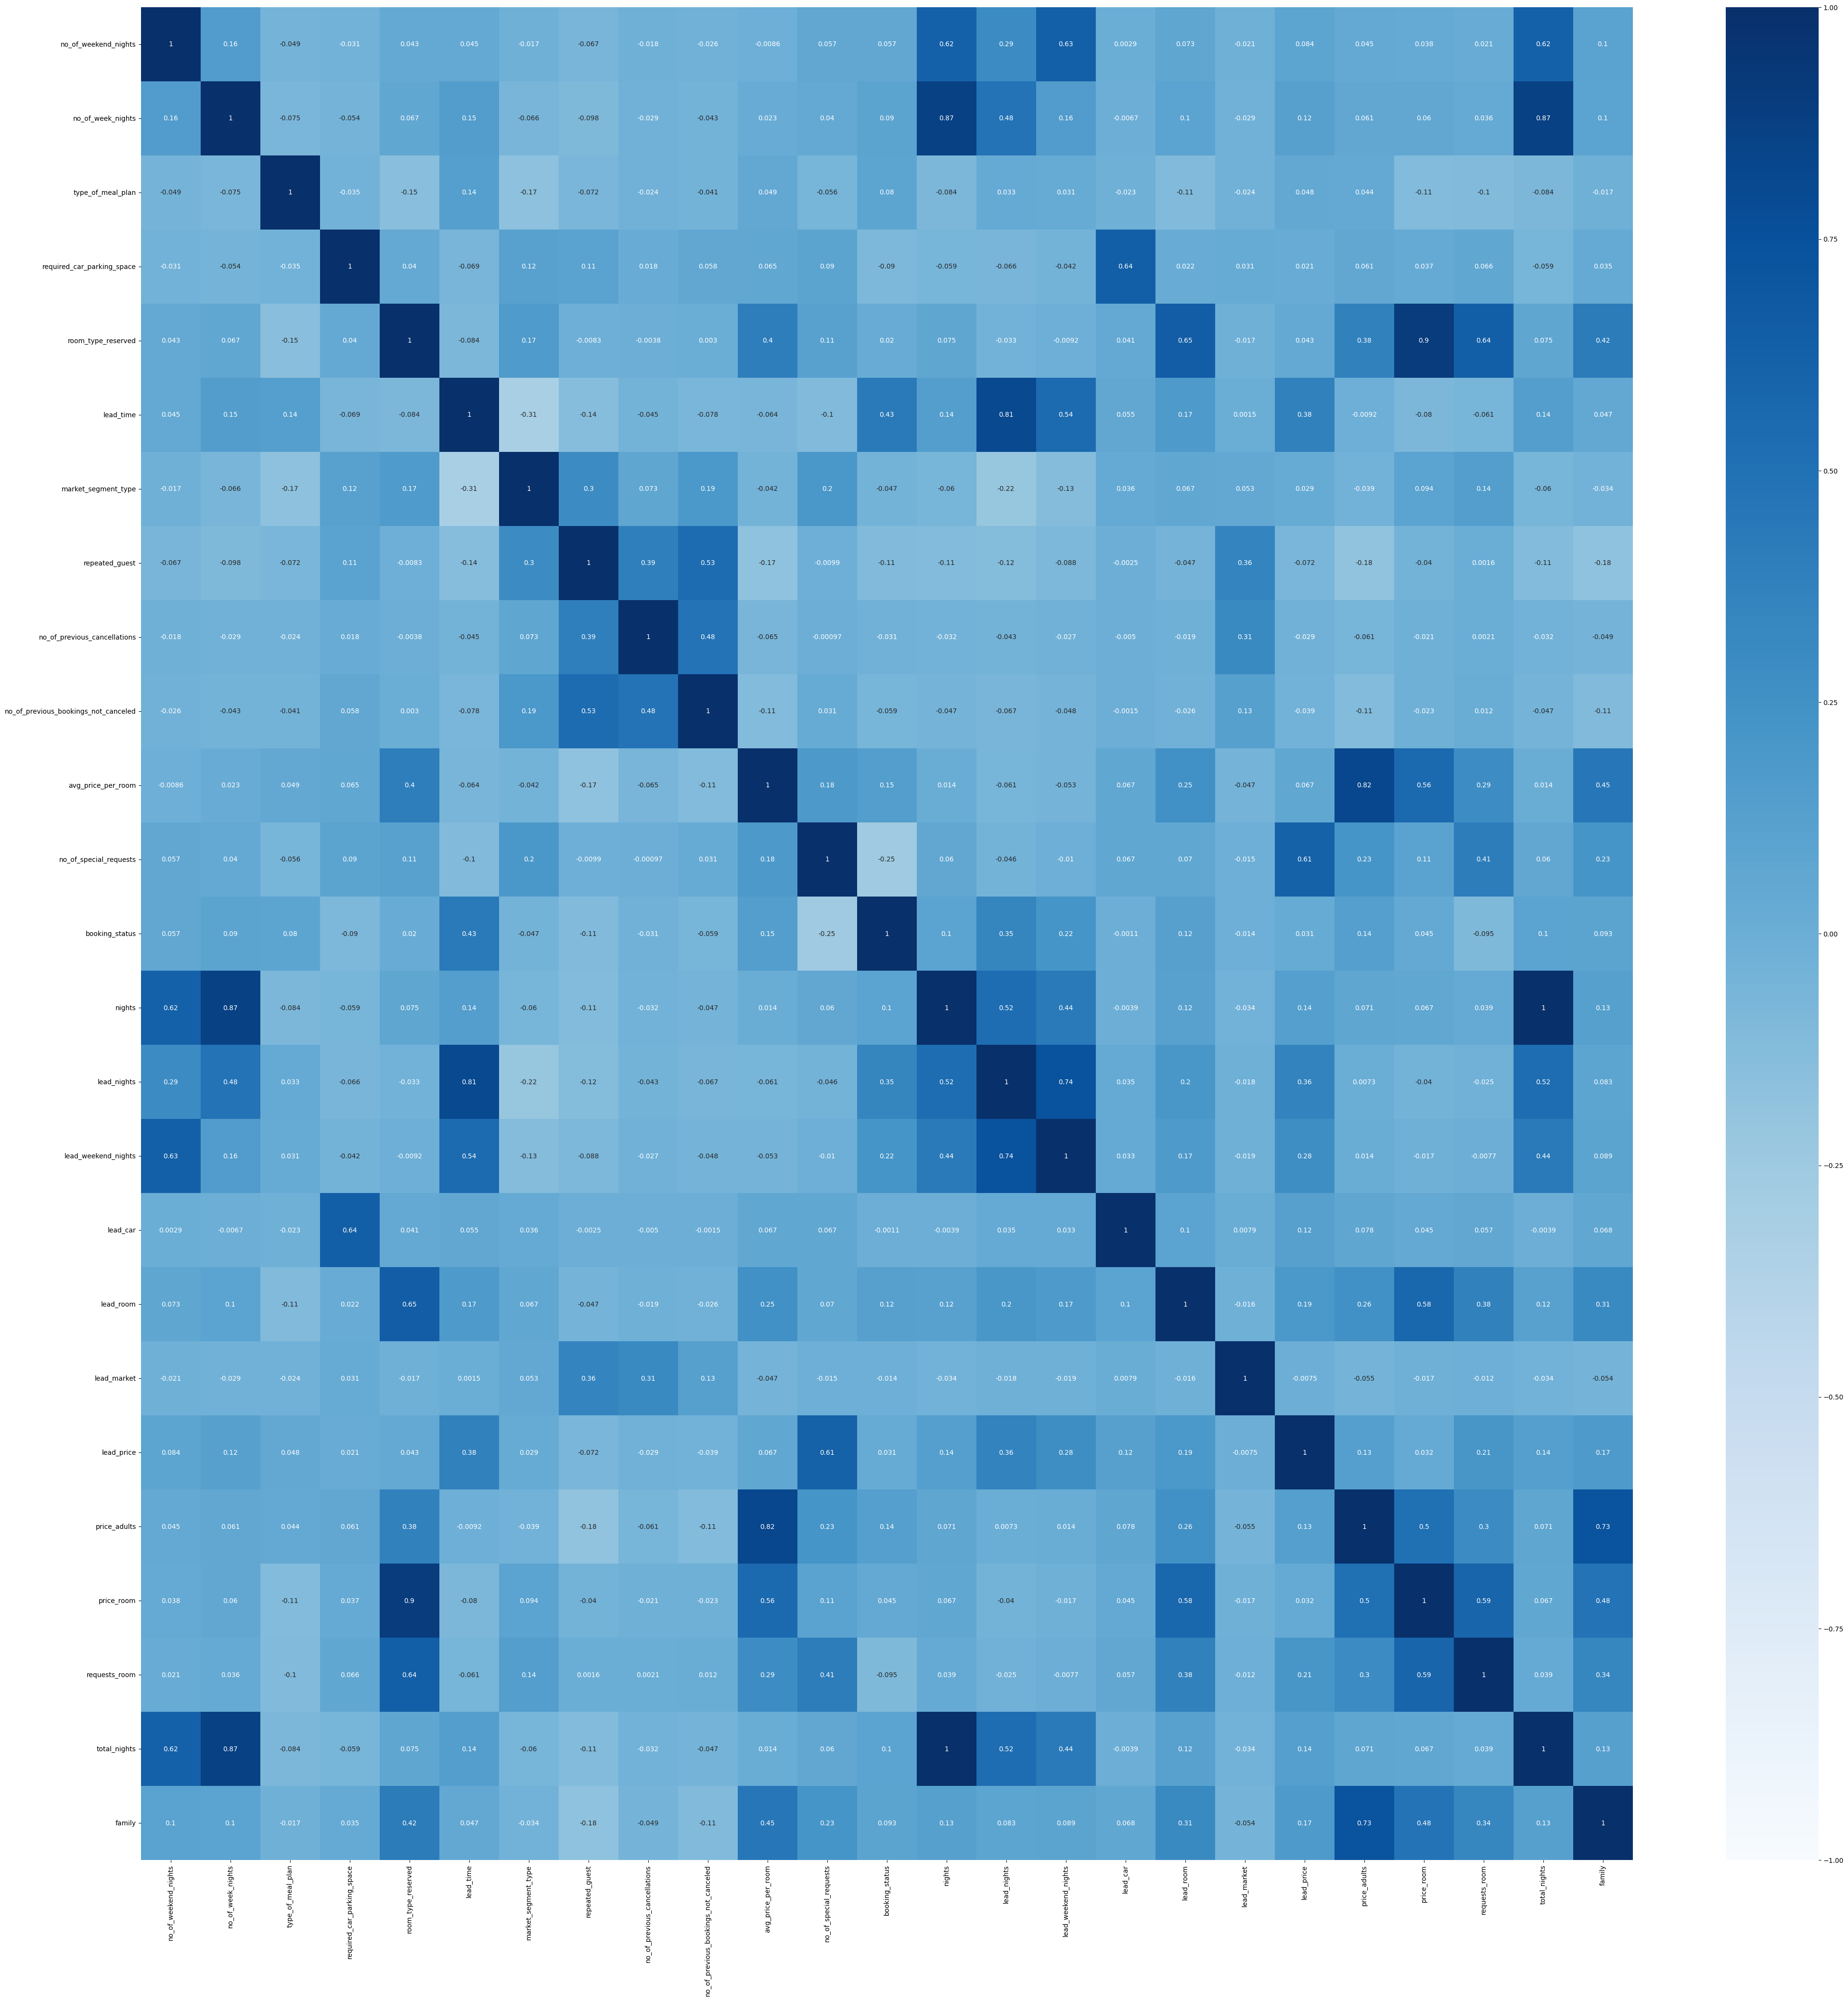

In [5]:
data = pd.read_csv('real_real_final_train.csv')
get_corr(data)